In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

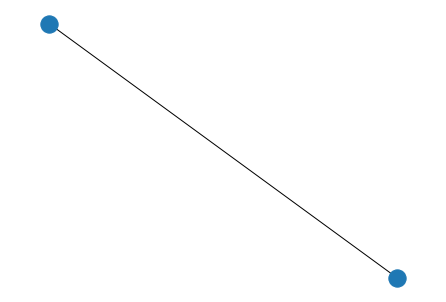

In [2]:
g = nx.Graph()
g.add_nodes_from(["A", "B"])
g.add_edges_from([("A", "B")])
nx.draw(g)

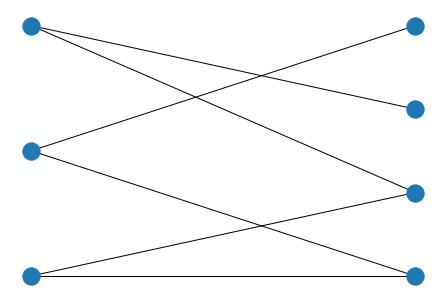

In [24]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4],bipartite=0)
B.add_nodes_from(['a', 'b', 'c'],bipartite=1)
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])
# This line splits the node lists into two sets and selects the second set as the left hand side
# this only affects layout I could have easily selected the first set
top = nx.bipartite.sets(B)[1]
nx.draw(B, nx.bipartite_layout(B, top))

In [4]:
prj_graph = nx.projected_graph(B, [1, 2, 3, 4])

adj_list = []
for n, nbrs in prj_graph.adj.items():
    for nbr, eattr in nbrs.items():
        adj_list += [(n, nbr)]
print(adj_list)

# or if your comfortable with complex list-comprehensions:
adj_list = [(n,nbr) for n, nbrs in prj_graph.adj.items()
                    for nbr, eattr in nbrs.items()]
print(adj_list)

[(1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (4, 1)]
[(1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (4, 1)]


In [7]:
print(nx.adjacency_matrix(prj_graph).todense())

[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]


In [9]:
G = nx.gnp_random_graph(20,0.02,directed=True)
print(G.in_degree())

[(0, 2), (1, 0), (2, 1), (3, 1), (4, 0), (5, 0), (6, 0), (7, 1), (8, 1), (9, 0), (10, 1), (11, 0), (12, 0), (13, 4), (14, 0), (15, 1), (16, 1), (17, 1), (18, 0), (19, 0)]


In [10]:
print(G.out_degree())

[(0, 0), (1, 0), (2, 1), (3, 0), (4, 1), (5, 0), (6, 2), (7, 1), (8, 0), (9, 2), (10, 0), (11, 0), (12, 2), (13, 0), (14, 0), (15, 1), (16, 0), (17, 2), (18, 0), (19, 2)]


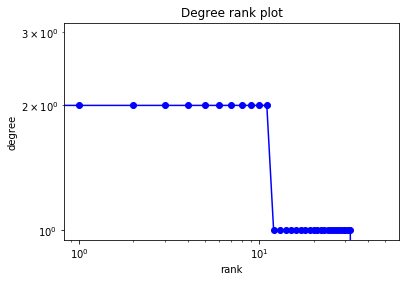

In [13]:
G = nx.gnp_random_graph(50,0.02,directed=False)
degree_sequence = sorted(dict(nx.degree(G)).values(),reverse=True)
plt.loglog(degree_sequence,'b-',marker='o')
plt.title('Degree rank plot')
plt.ylabel('degree')
plt.xlabel('rank');

In [14]:
G = nx.gnp_random_graph(50,0.06,directed=True)
sg = nx.strongly_connected_components(G)
print([list(l) for l in sg])

[[45], [23], [28], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 49], [0], [48], [43]]


In [15]:
sg = nx.weakly_connected_components(G)
print([list(l) for l in sg])

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]


In [16]:
#nx.shortest_path(Graph,source,target)
nx.shortest_path(G, 1, 24)

[1, 18, 21, 15, 10, 24]

In [17]:
nx.density(G)

0.04938775510204082

In [19]:
print(nx.degree_centrality(G))

{0: 0.061224489795918366, 1: 0.08163265306122448, 2: 0.16326530612244897, 3: 0.14285714285714285, 4: 0.16326530612244897, 5: 0.08163265306122448, 6: 0.14285714285714285, 7: 0.08163265306122448, 8: 0.061224489795918366, 9: 0.14285714285714285, 10: 0.12244897959183673, 11: 0.04081632653061224, 12: 0.08163265306122448, 13: 0.14285714285714285, 14: 0.1020408163265306, 15: 0.16326530612244897, 16: 0.12244897959183673, 17: 0.1020408163265306, 18: 0.061224489795918366, 19: 0.061224489795918366, 20: 0.12244897959183673, 21: 0.18367346938775508, 22: 0.12244897959183673, 23: 0.04081632653061224, 24: 0.08163265306122448, 25: 0.2040816326530612, 26: 0.12244897959183673, 27: 0.14285714285714285, 28: 0.061224489795918366, 29: 0.08163265306122448, 30: 0.061224489795918366, 31: 0.04081632653061224, 32: 0.1020408163265306, 33: 0.14285714285714285, 34: 0.08163265306122448, 35: 0.12244897959183673, 36: 0.08163265306122448, 37: 0.04081632653061224, 38: 0.061224489795918366, 39: 0.061224489795918366, 40: 0

In [20]:
print(nx.betweenness_centrality(G))

{0: 0.0, 1: 0.08319160997732425, 2: 0.18795452704891474, 3: 0.1070239107547781, 4: 0.04119897959183673, 5: 0.04440395205701328, 6: 0.052503441852931654, 7: 0.018033284742468413, 8: 0.006271258503401361, 9: 0.11682964852607705, 10: 0.042617225461613215, 11: 0.018069727891156462, 12: 0.00885062358276644, 13: 0.035962301587301584, 14: 0.030452806122448984, 15: 0.14183774700356333, 16: 0.054532616618075805, 17: 0.02027048914804017, 18: 0.027529761904761904, 19: 0.019856454486556527, 20: 0.18124797538062842, 21: 0.14989421363783612, 22: 0.05986192095885972, 23: 0.0, 24: 0.05210864107547781, 25: 0.31040198817622294, 26: 0.1712352202785876, 27: 0.14041545189504376, 28: 0.0, 29: 0.01770124716553288, 30: 0.041312358276643986, 31: 0.0029939058956916097, 32: 0.011267006802721089, 33: 0.12139314058956915, 34: 0.023809523809523808, 35: 0.06077806122448979, 36: 0.07239026563006155, 37: 0.009105725623582767, 38: 0.005562641723356009, 39: 0.028878158406219632, 40: 0.08520813087139618, 41: 0.0170224935

In [21]:
print(nx.closeness_centrality(G))

{0: 0.0, 1: 0.18144400617389814, 2: 0.3598639455782313, 3: 0.26331508213041316, 4: 0.30198373055515915, 5: 0.2297003907946157, 6: 0.2439755563242246, 7: 0.2170033842682802, 8: 0.136657194523379, 9: 0.29577858540676544, 10: 0.24818203143326298, 11: 0.23727293115048217, 12: 0.24818203143326298, 13: 0.33737244897959184, 14: 0.2937664861863113, 15: 0.3106739098517105, 16: 0.2453617810760668, 17: 0.287891156462585, 18: 0.1558977381566345, 19: 0.20085429520645467, 20: 0.26822157434402333, 21: 0.2998866213151927, 22: 0.21484414661386944, 23: 0.21570159164144126, 24: 0.20274025102998947, 25: 0.3347571586774245, 26: 0.324689274205923, 27: 0.3198790627362056, 28: 0.2605874719830128, 29: 0.24818203143326298, 30: 0.22848504481157542, 31: 0.18775510204081636, 32: 0.2170033842682802, 33: 0.22032486463973347, 34: 0.15533695492585525, 35: 0.2698979591836735, 36: 0.27159543062508024, 37: 0.13579771531254012, 38: 0.2585848710741782, 39: 0.2309287351304158, 40: 0.32964636236173855, 41: 0.1885749933161037

In [22]:
G = nx.erdos_renyi_graph(30,0.05)

In [23]:
B = nx.barabasi_albert_graph(30,3)